# Natural Language Processing: A five-minute intro with code 
NLP = use machines to understand and analyze human language

Three approaches to NLP:
- Dictionary- and rule-based (1950s-1980s) 
- Machine Learning and Statistics (1990s-2010s)
- Transformers (2018-Present)

## Dictionaries
Pros:
- Easy to use
- Explainable (clear connection between construct and measure)

Cons:
- Not flexible (miss context)
- Limited and dependent on dictionary choice/availability



### Set Up and Word Cloud 

In [2]:
pip install matplotlib_venn_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for matplotlib-venn-wordcloud: filename=matplotlib_venn_wordcloud-0.2.5-py3-none-any.whl size=10810 sha256=2755ed26c0196ca396cd4f049af1bcba03352e6a430b552ac4f9b7bdceea03c8
  Stored in directory: /root/.cache/pip/wheels/b8/7e/25/80c14d2abb358c493d7772fe3a9370a7742fc1ae68968c33ef
Successfully built matplotlib-venn-wordcloud


In [3]:
import pandas as pd # dealing with data
import numpy as np # dealing with numbers 

import re # dealing with text
from tqdm import tqdm # creats a progress bar

import matplotlib.pyplot as plt # plots things 

from google.colab import drive # connects to data on google drive 
drive.mount('/drive')

Mounted at /drive


In [4]:
# read in the data 
# data from Brady et al. (2017) PNAS Moral Contagion https://osf.io/59uyz/
data = pd.read_csv("/drive/My Drive/NLPIntro/C_raw.csv")
data = data.drop_duplicates(["text"])
data.head()

,id_str,timestamp,retweeted_status.id_str,user.id_str,user.screen_name,user.location,user.description,text,user.followers_count,user.verified,contains.url,contains.media,ideology
0,660209050429186048,2015-10-30 21:37:58,NaN,277335277,CourtneyIndart,"Caldwell, Idaho",Figuring out what life is all about.,Expert briefing on #climatechange #disarmament...,38,False,False,True,-0.393704
1,660209072768212992,2015-10-30 21:38:03,6.597837e+17,325105950,PicnicPops,Baltimore,Markets*Weddings*Festivals,RT @NASAEarthData: Who Uses #NASA Earth Scienc...,1062,False,True,True,-0.811322
2,660209067584016384,2015-10-30 21:38:02,6.601978e+17,90280824,Suma4720,None,"IMO Libertarians, Republicans & RWNJS share th...","RT @Libertea2012: RT: Oddly enough, some Repub...",4137,False,True,True,-0.795976
3,660209102790914048,2015-10-30 21:38:10,NaN,68956490,RedScareBot,Wisconsin,Joseph McCarthy claimed there were large numbe...,Better Dead than Red! RT @tomemurtha Bill Gate...,15227,False,True,False,2.292862
4,660209083505504256,2015-10-30 21:38:06,NaN,68956490,RedScareBot,Wisconsin,Joseph McCarthy claimed there were large numbe...,I see red people RT @eduardochiar Bill Gates s...,15227,False,True,False,2.292862


In [5]:
data["binary_ideology"] = data["ideology"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# visualize data by creating a wordcloud
from wordcloud import WordCloud
stopwords = set("rt").union(STOPWORDS)
words = " ".join(corpus)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 12).generate(words)                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'compound': 0.8012, 'neg': 0.0, 'neu': 0.295, 'pos': 0.705}

In [10]:
data["polarity"] = data["text"].apply(lambda text: sia.polarity_scores(text))
data["is_negative"] = data["polarity"].apply(lambda scores: 1 if scores["compound"] < 0 else 0)
data["is_positive"] = data["polarity"].apply(lambda scores: 1 if scores["compound"] > 0 else 0)
data["extreme"]  = data["ideology"].apply(lambda scores: 1 if (scores > 1 or scores < -1) else 0)

In [11]:
print("Is_Neg \t Text")
for i in range(40,50):
  item = data.iloc[i]
  print(str(item["is_negative"]) + "\t " + item["text"])
  i+=1
  if i == 5:
    break

Is_Neg 	 Text
0	 RT @Carbongate: "soot" no doubt volcanic in origin! Greenland ice melt due to global warming found not so bad  https://t.co/yQSmD6D4SM via …
0	 RT @Sara_in_ATX: In TX drought, wildfires, hurricanes &amp; floods. This is climate change. This is political. We need action.  #ActOnClimate
0	 RT @Soonchurcher: Ted Cruz: ‘Climate change is not science, it’s religion’ https://t.co/0qqTBoFE0h via @glennbeck
0	 RT @KUOW: Climate change activists haul nearly 250K signatures into the Secretary of State's office https://t.co/g9KJcnMtP1 https://t.co/fa…
1	 RT @seanmdav: Nothing says "I'm pro-science" like refusing to release your data https://t.co/NdKWI67IEw
0	 RT @StuckeyBenfield: Mayor @KasimReed NPR interview:  Cities have a moral obligation to lead on #ClimateChange: https://t.co/GqJD9gYTne htt…
1	 HIDE THE SCIENCE! #NOAA withholds #climateChange documents from Congress! https://t.co/sb1gRxVLHI #tlot #tcot #tech #uniteblue #p2 #CLIMATE
0	 RWW News: Ted Cruz Says That 'Climate C

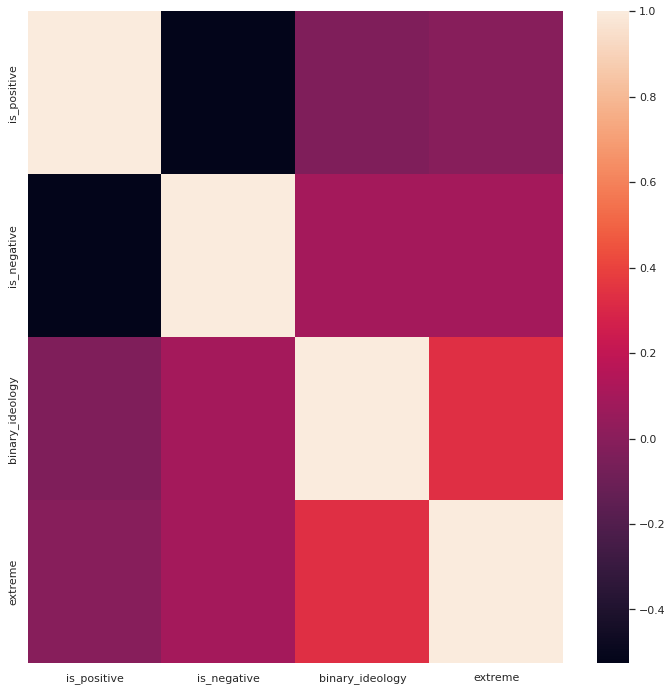

In [12]:
cor = data[["is_positive","is_negative", "binary_ideology", "extreme"]].corr()
import seaborn as sns 
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cor);

## Statistics and ML
Pros:
- Can get context
- Give more analyses options

Cons: 
- Need to label data (sometimes) 
- Can be harder to explaine
- Can be too flexible (overfit)

In [13]:
from wordcloud import STOPWORDS 
from nltk.tokenize import word_tokenize 
def clean_text(text):
  """ 
  cleans a string: 
    - gets rid of urls, Twitter usernames, numbers, and stopwords
    - lowercases everything
  
  in:  str
  out: str
  """

  tokens = word_tokenize(text.strip())
  stopwords = set({"rt", "", " "}).union(STOPWORDS)

  tokens = [re.sub(r"http\S+","",token) for token in tokens]
  tokens = [re.sub(r"@\S+","",token) for token in tokens]
  tokens = [token.lower() for token in tokens]
  tokens = [re.sub("[^\w\s]", "", token) for token in tokens]  
  tokens = [token for token in tokens if token not in stopwords]

  return " ".join(tokens)
import nltk
nltk.download('punkt')

# create a corpus with clean text from the data
corpus = []
for item in tqdm(data["text"]):
  corpus.append(clean_text(item))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 304810/304810 [01:44<00:00, 2919.71it/s]


In [14]:
from sklearn.model_selection import train_test_split # splits data into train and test chunks 
from sklearn.feature_extraction.text import CountVectorizer # makes a table with word frequency per word (col) and document (row)
from sklearn.naive_bayes import BernoulliNB # the model that we're fitting to the data
from sklearn import metrics # measures how well the model performs 

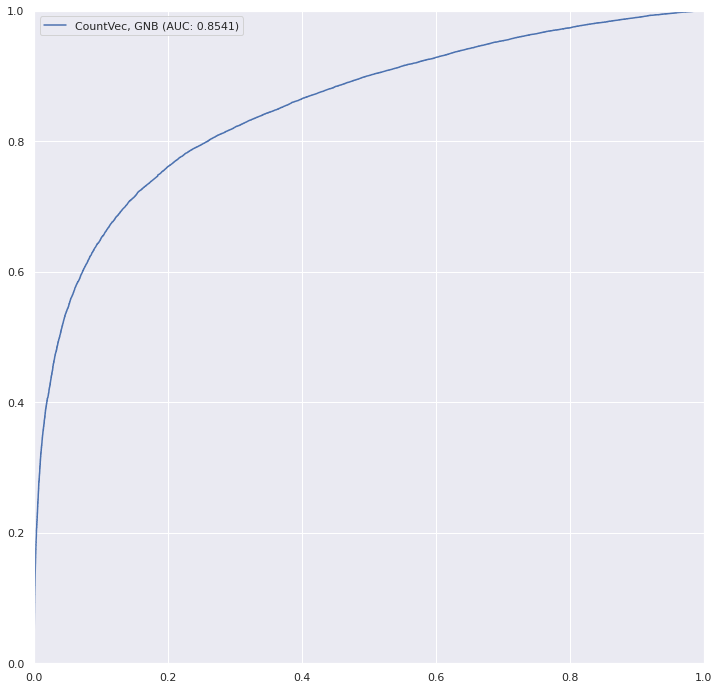

In [18]:
# Naive Bayes code
df = pd.DataFrame(data = { "X": corpus, "Y": data.binary_ideology})

X_train, X_test, Y_train, Y_test = train_test_split(df["X"], df["Y"], train_size=.75,random_state=17)

cv = CountVectorizer() 

cv.fit(X_train)
cv_X_train = cv.transform(X_train)
cv_X_test = cv.transform(X_test)

clf = BernoulliNB()
clf.fit(cv_X_train, Y_train)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf.predict_proba(cv_X_test)[:,1]) 
auc = metrics.roc_auc_score(Y_test, clf.predict_proba(cv_X_test)[:,1])

plt.plot(fpr, tpr, label="CountVec, GNB"+' (AUC: '+str(round(auc,4))+')')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend();

In [19]:
neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()[::-1]

top_n = 50
liberal = [word for word in np.take(cv.get_feature_names_out(), neg_class_prob_sorted)[:top_n] if len(word) > 3]
conservative = [word for word in np.take(cv.get_feature_names_out(), pos_class_prob_sorted)[:top_n] if len(word) > 3]

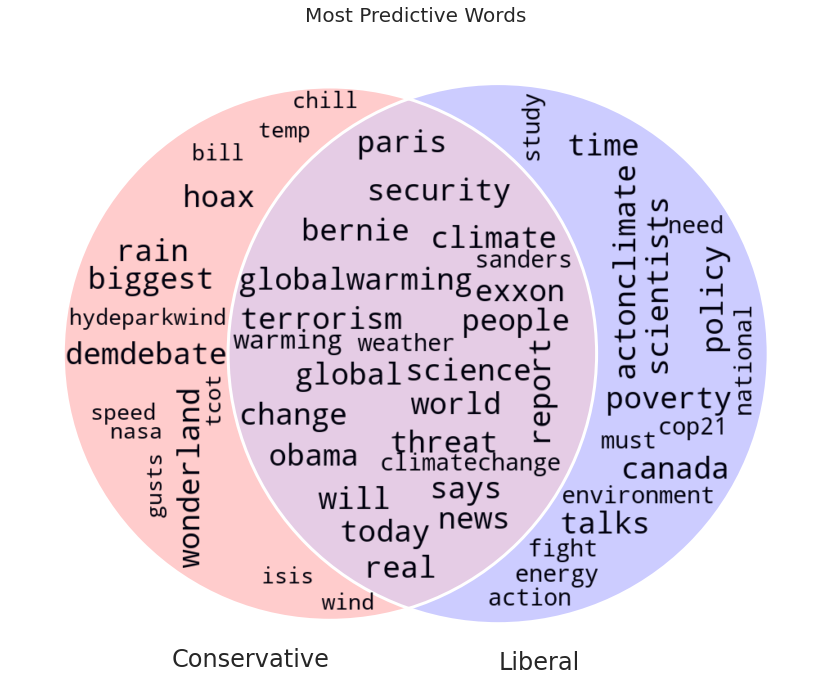

In [20]:
from matplotlib_venn_wordcloud import venn2_wordcloud

fig, ax = plt.subplots(figsize=(15,12))

ax.set_title('Most Predictive Words', fontsize=20)
v = venn2_wordcloud([set(conservative), set(liberal)],
                    set_colors=['red', 'blue'],
                    set_edgecolors=['w', 'w'],
                    alpha = .2,
                    ax=ax, set_labels=['Conservative', 'Liberal'])
                    #word_to_frequency=freq_dict )
    
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.2)

## Transformers 

Check out openAI's GPT3 playground:
https://beta.openai.com/playground